### Домашняя работа

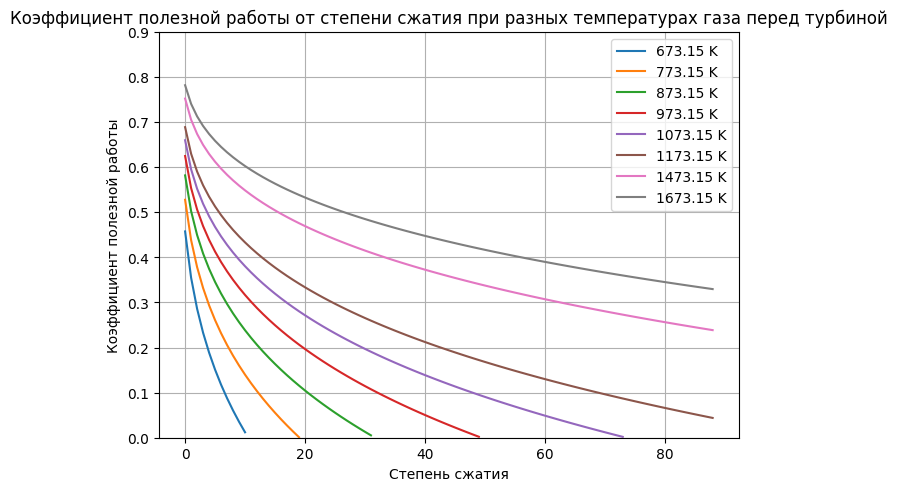

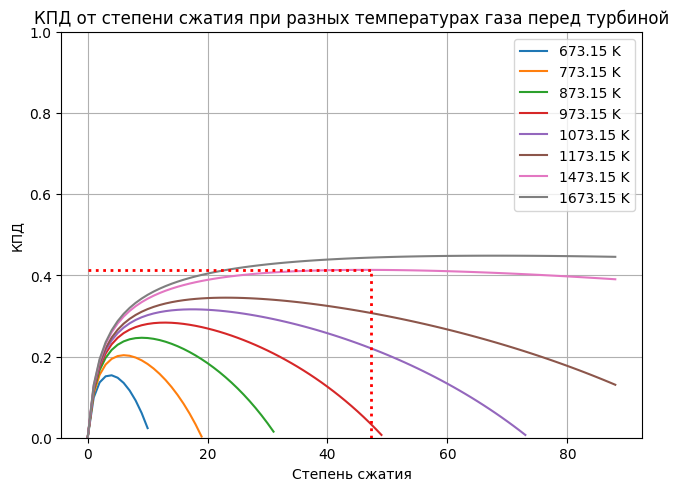

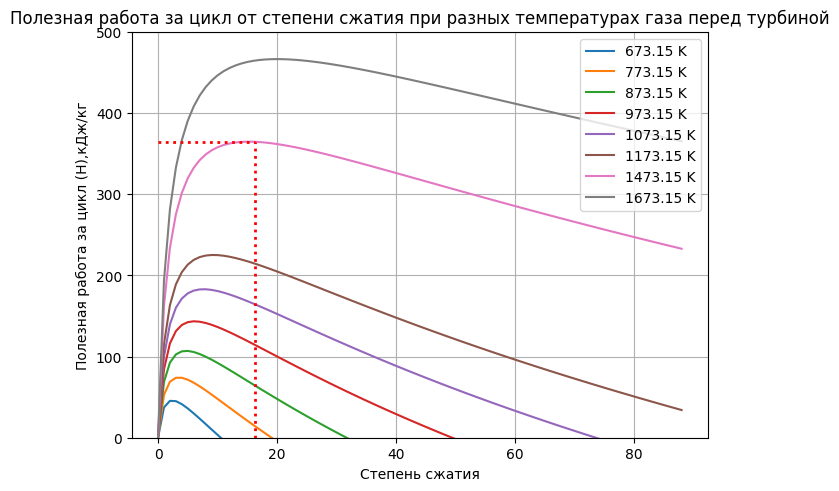

In [6]:
import matplotlib.pyplot as plt
import numpy as np
to_kelvin = lambda x: x + 273.15
to_celsel = lambda x: x - 273.15

#Исходные данные
turbine_efficiency = 0.88
compressor_efficiency = 0.85
t_a = 0
T_a = to_kelvin(t_a)
m = 0.25
combustor_efficiency = 1
t_с = (400, 500, 600, 700, 800, 900, 1200, 1400)
T_c = list(map(to_kelvin, t_с))
eps = list(range(1,90,1))
Cp_air = 1007
Cp_gas = 1225
Cp = (Cp_air + Cp_gas) / 2

def find_thermal_efficiency(eps,m):
    return 1 - eps ** (-m)

def find_phi(eps,m,T_c,T_a):
    tau = T_c / T_a 
    return  1 - ((eps ** m) / tau)

def complite_kpd(eps, m, T_c, T_a, turbine_efficiency, compressor_efficiency):
    tau = T_c / T_a 
    num_1 = tau * turbine_efficiency * (1 - eps ** (-m))
    num_2 = ((eps ** m) - 1) / compressor_efficiency
    denum = tau - 1 - (eps ** m - 1) / compressor_efficiency

    efficiency = (num_1 - num_2) / denum

    num = eps ** m
    denum = tau * turbine_efficiency * compressor_efficiency
    work_coeff = 1 - num/denum
    return efficiency,work_coeff

def copliter_work(eps, m, T_c, T_a, turbine_efficiency, compressor_efficiency):
    H_t = Cp * T_c * (1 - eps ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((eps ** m) - 1) / compressor_efficiency
    work = (H_t - H_k) / 1000
    return work

thermal_efficiency = []
for value in eps:
    thermal_efficiency.append(find_thermal_efficiency(value, m))
 

phi = dict({})
for value in T_c:
    phi[value] = []
    for valueps in eps:
        phi[value].append(find_phi(valueps, m, value, T_a))

efficiency = dict({})
for value in T_c:
    efficiency[value] = []
    for valueps in eps:
        a = complite_kpd(valueps, m, value, T_a, turbine_efficiency, compressor_efficiency)
        if a[0]>=0:
            efficiency[value].append(a[0])
        else:
            break
work_coeff = dict({})
for value in T_c:
    work_coeff[value] = []
    for valueps in eps:
        a = complite_kpd(valueps, m, value, T_a, turbine_efficiency, compressor_efficiency)
        if a[0]>=0:
            work_coeff[value].append(a[1])
        else:
            break

work = dict({})
for value in T_c:
    work[value] = []
    for valueps in eps:
        work[value].append(copliter_work(valueps, m, value, T_a, turbine_efficiency, compressor_efficiency))


T_opimal = to_kelvin(1200)
st = 1 / (2 * m)
eps_opt_H = ((T_opimal / T_a) * turbine_efficiency * compressor_efficiency) ** st
max_eff_1200 = max(efficiency[T_opimal])
eps_opt_eff = (((T_opimal / T_a) * turbine_efficiency * compressor_efficiency) / (1 - max_eff_1200)) ** st
eff_opt = complite_kpd(eps_opt_eff, m, T_opimal, T_a, turbine_efficiency, compressor_efficiency)[0]
H_opt = copliter_work(eps_opt_H, m, T_opimal, T_a, turbine_efficiency, compressor_efficiency)

plt.figure(layout = 'constrained')
for value in list(work_coeff.keys()):
    eps = list(range(0,len(work_coeff[value])))
    plt.plot(eps,work_coeff[value], label = f'{value} K')  

plt.ylim([0,0.9])
plt.xlabel('Степень сжатия')
plt.ylabel('Коэффициент полезной работы')
plt.title("Коэффициент полезной работы от степени сжатия при разных температурах газа перед турбиной")
plt.legend()
plt.grid()


plt.figure(layout = 'constrained')
    
for value in list(efficiency.keys()):
    eps = list(range(0,len(efficiency[value])))
    plt.plot(eps,efficiency[value], label = f'{value} K')  

plt.ylim([0,1])

plt.vlines(eps_opt_eff, 0, eff_opt, color = 'r', linewidth = 2, linestyle = ':')
plt.hlines(eff_opt, 0, eps_opt_eff, color = 'r', linewidth = 2, linestyle = ':') 

plt.xlabel('Степень сжатия')
plt.ylabel('КПД')
plt.title("КПД от степени сжатия при разных температурах газа перед турбиной")
plt.legend()
plt.grid()


plt.figure(layout = 'constrained')
for value in list(work.keys()):
    eps = list(range(0,len(work[value])))
    plt.plot(eps,work[value], label = f'{value} K')  

plt.ylim([0,500])

plt.vlines(eps_opt_H, 0, H_opt, color = 'r', linewidth = 2, linestyle = ':')
plt.hlines(H_opt, 0, eps_opt_H, color = 'r', linewidth = 2, linestyle = ':') 

plt.xlabel('Степень сжатия')
plt.ylabel('Полезная работа за цикл (H),кДж/кг')
plt.title("Полезная работа за цикл от степени сжатия при разных температурах газа перед турбиной")
plt.legend()
plt.grid()
plt.show()